# County wise plot

In [1]:
import pandas as pd
import numpy as np

In [2]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
# this only need to be run once
%load_ext rpy2.ipython
%R library(ggplot2)

%R library(maps)

array(['maps', 'ggplot2', 'tools', 'stats', 'graphics', 'grDevices',
       'utils', 'datasets', 'methods', 'base'], dtype='<U9')

In [3]:
def handle_na_values(df):
    out_df = df.copy()
    for i in out_df.columns:
        if out_df[i].dtype == np.object:
            out_df[i] = out_df[i].astype(str)
    return out_df

In [7]:
%%R 
library(ggplot2)
library(dplyr)

In [8]:

def txt_into_df(path ):

    with open(path) as f:
        l = f.read()

    l = l.split('\n')

    l = [i.split('\t') for i in l]

    len_ = len(l[0])

    l = [i for i in l if len(i)==len_]

    return pd.DataFrame(l[1:] , columns = l[0])
    

In [10]:
county_df = txt_into_df('/Users/nithish/msds/msds593/proj_data/county_2017.txt')

In [11]:
county_df  = county_df.iloc[:-1]

In [22]:
county_df.columns = ["Notes", "County", "County Code", 'Deaths', 'Population',
       'Crude Rate', 'Age Adjusted Rate']

In [23]:
county_df.head()

,Notes,County,County Code,Deaths,Population,Crude Rate,Age Adjusted Rate
0,,"Baldwin County, AL","""01003""",27,212628,12.7,13.8
1,,"Blount County, AL","""01009""",18,58013,Unreliable,Unreliable
2,,"Calhoun County, AL","""01015""",31,114728,27.0,29.8
3,,"Cullman County, AL","""01043""",19,82755,Unreliable,Unreliable
4,,"DeKalb County, AL","""01049""",26,71617,36.3,36.2


In [24]:
county_df.County = county_df.County.apply(lambda x: x.strip().split(',')[0])

In [26]:
county_df = county_df.loc[~(county_df['Age Adjusted Rate']=='Unreliable')]

In [27]:
county_df.shape

(620, 7)

In [35]:
# county_df.County = county_df.County.apply(lambda x : x.split('"')[1])
county_df.loc[:,'Age Adjusted Rate'] = county_df.loc[:,'Age Adjusted Rate'].astype(float)

In [37]:
county_df.head()

,Notes,County,County Code,Deaths,Population,Crude Rate,Age Adjusted Rate
0,,Baldwin County,"""01003""",27,212628,12.7,13.8
2,,Calhoun County,"""01015""",31,114728,27.0,29.8
4,,DeKalb County,"""01049""",26,71617,36.3,36.2
6,,Etowah County,"""01055""",35,102755,34.1,35.2
8,,Jefferson County,"""01073""",208,659197,31.6,32.6


In [38]:
county_df = county_df[['County','Age Adjusted Rate']]

In [39]:
county_df.columns = ['county_name', 'AAR']

In [40]:
%R -i county_df

In [17]:
def color_func(value_in):
    if value_in>40:
        return '1'
    elif 30<value_in<=40:
        return '2'
    elif 20<value_in<=30:
        return '3'
    elif 10<value_in<=20:
        return '4'
    else:
        return '5'

In [42]:
%R library(usmap)

array(['usmap', 'dplyr', 'urbnmapr', 'sf', 'maps', 'ggplot2', 'tools',
       'stats', 'graphics', 'grDevices', 'utils', 'datasets', 'methods',
       'base'], dtype='<U9')

In [43]:
%%R

head(countypop)

# A tibble: 6 x 4
  fips  abbr  county         pop_2015
  <chr> <chr> <chr>             <dbl>
1 01001 AL    Autauga County    55347
2 01003 AL    Baldwin County   203709
3 01005 AL    Barbour County    26489
4 01007 AL    Bibb County       22583
5 01009 AL    Blount County     57673
6 01011 AL    Bullock County    10696


In [44]:
county_df.columns

Index(['county_name', 'AAR'], dtype='object')

In [49]:
%%R
head(statepop)

plot_df <- left_join(county_df , countypop , by=c('county_name'='county'))

R[write to console]: Saving 11 x 11 in image



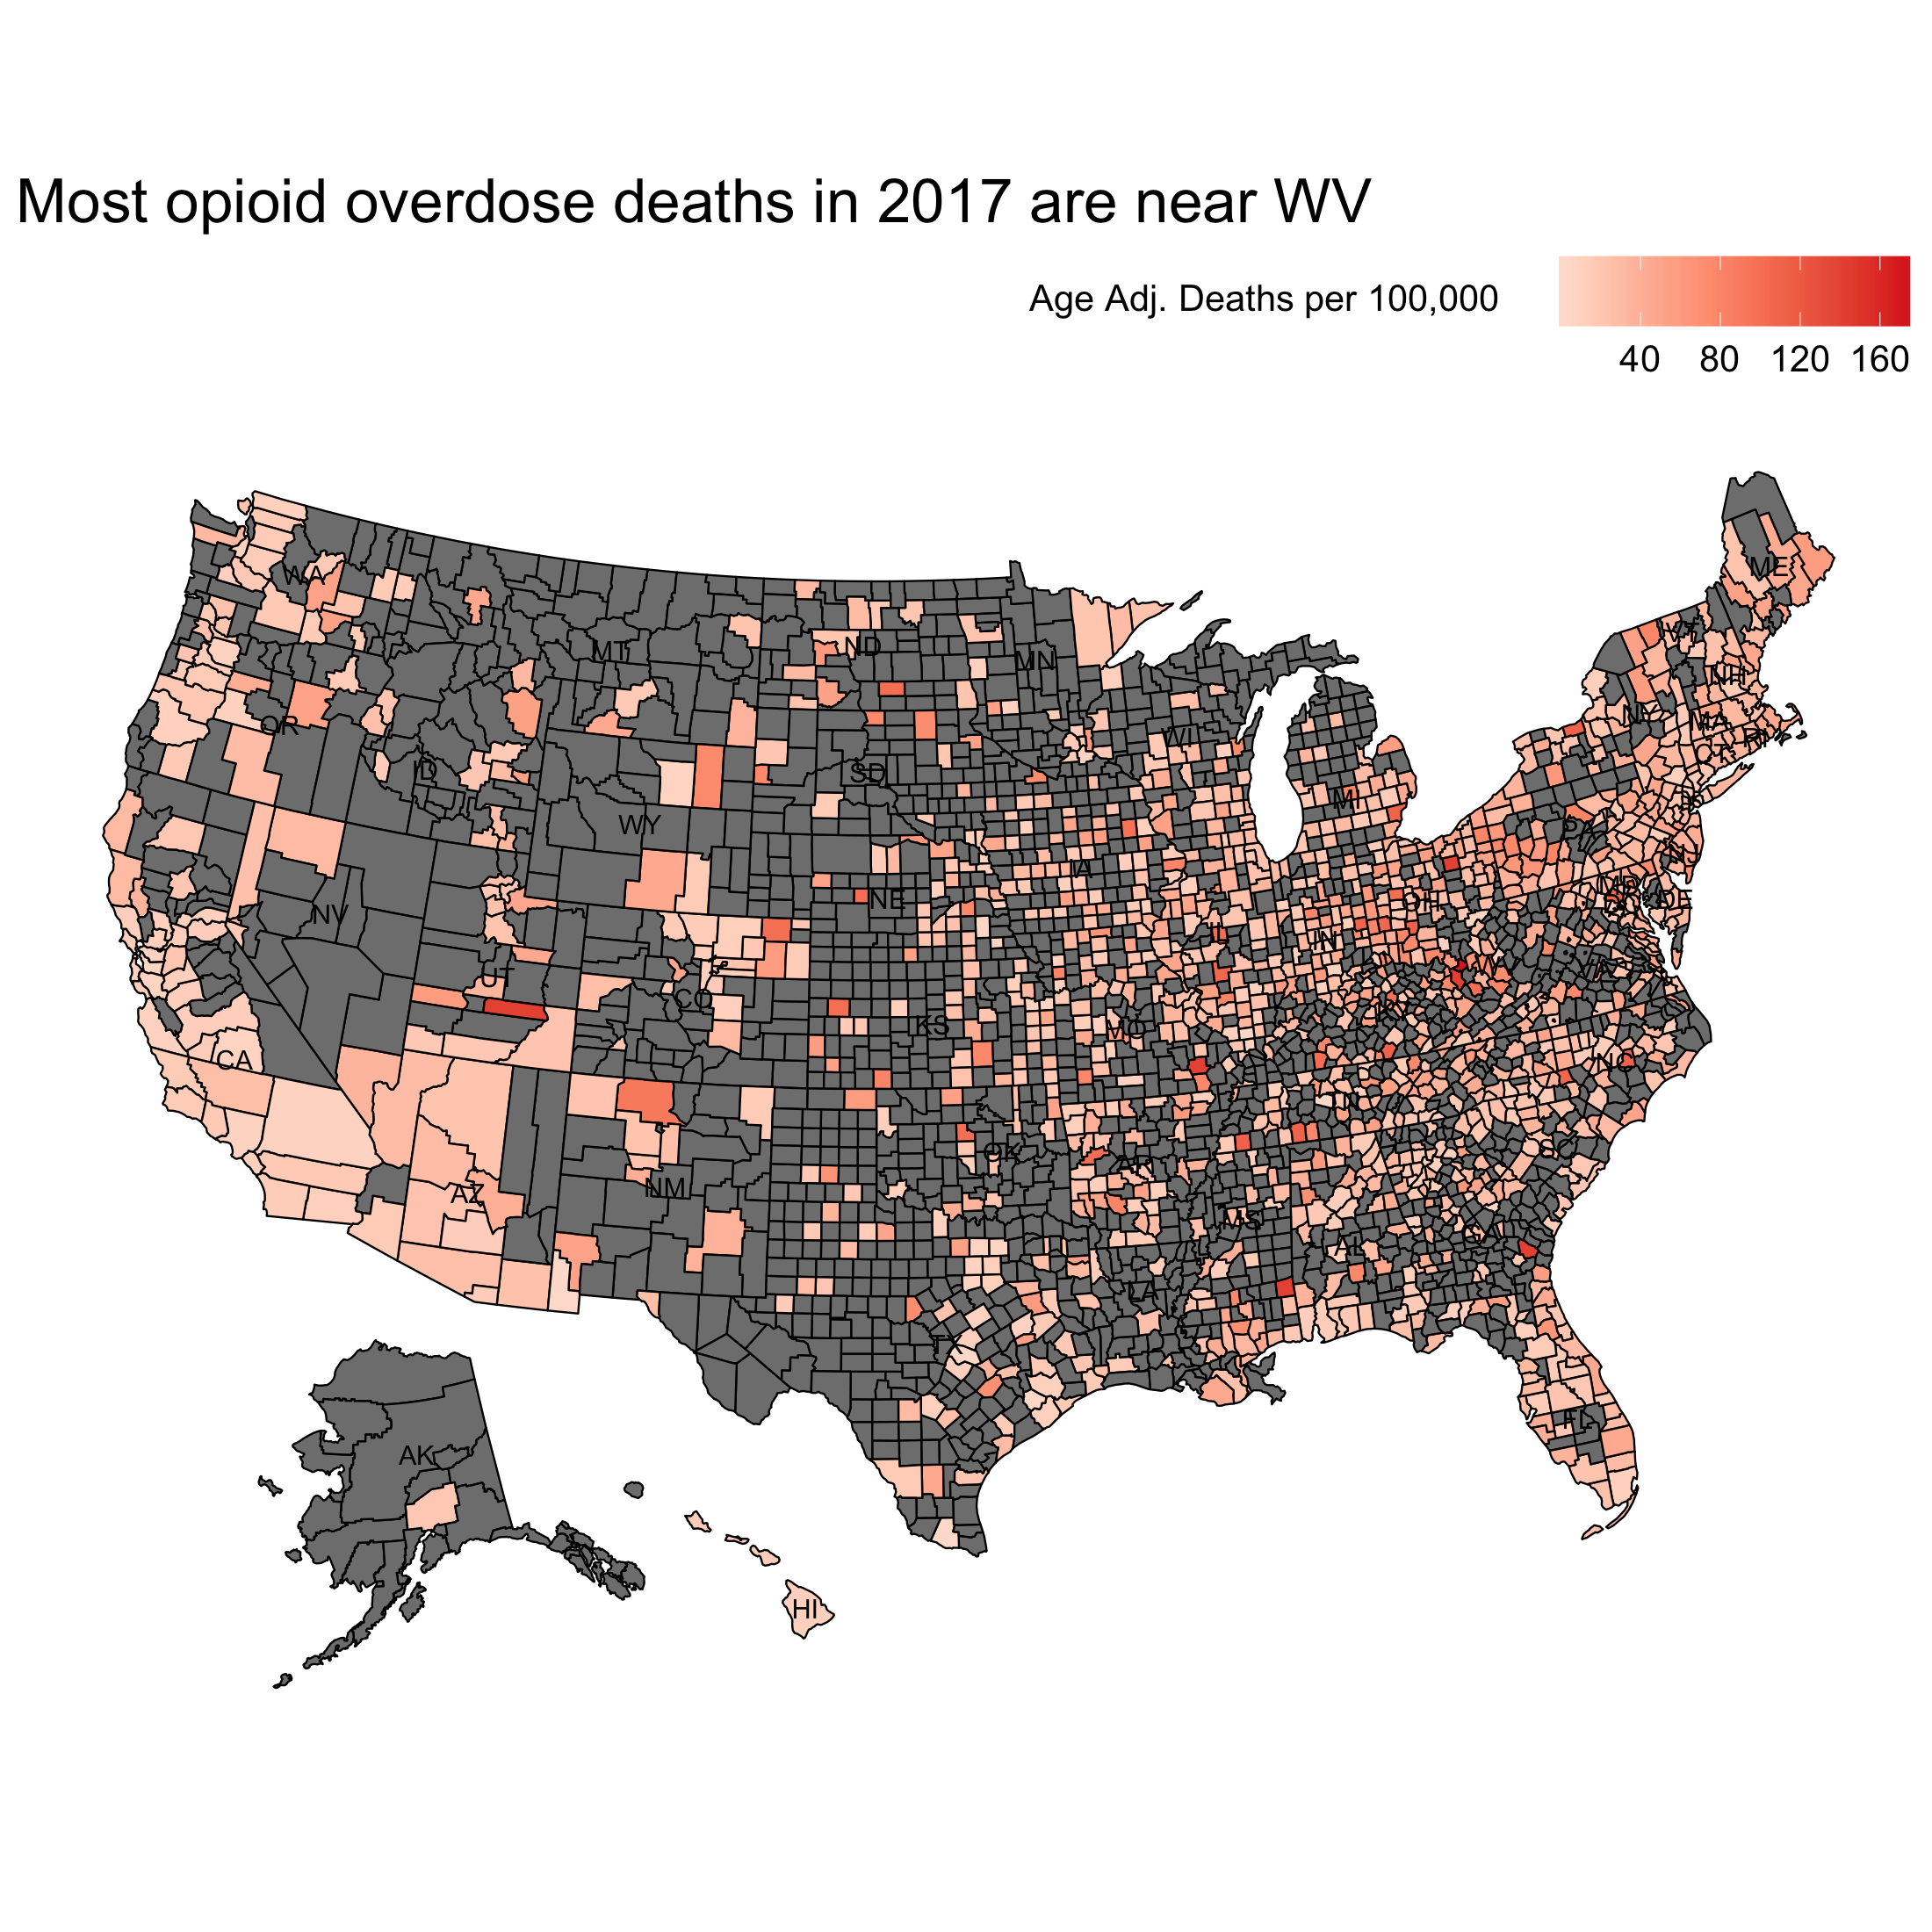

In [51]:
%%R -w 11 -h 11 --units in -r 200




plot_usmap(data = plot_df, values = 'AAR',labels=TRUE) + 

  scale_fill_gradientn(name='Age Adj. Deaths per 100,000    \n' , colours = c('#fee0d2' , '#fc9272' , '#de2d26') )  + 
  theme(legend.position='top',
       legend.justification = c(1,1 ),
       legend.text = element_text(color='black',size=15),
       legend.title=element_text(color='black',size=15),legend.key.size = unit(2,"line"),
       plot.title  = element_text(size=25)) + 
ggtitle('Most opioid overdose deaths in 2017 are near WV') +

ggsave('/Users/nithish/Desktop/county_plot_v1.png')
  